In [1]:
import numpy as np;

from google.colab import drive;
drive.mount('/content/drive');

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt

Ring = np.loadtxt('/content/drive/My Drive/4BL/RLC_RING0.csv')

(27840.0, 28350.0)

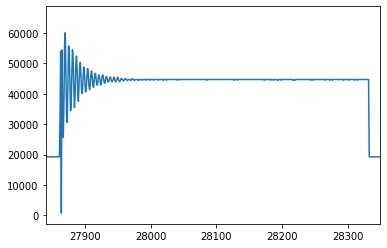

In [10]:
plt.plot(Ring)
plt.xlim([27840,28350])

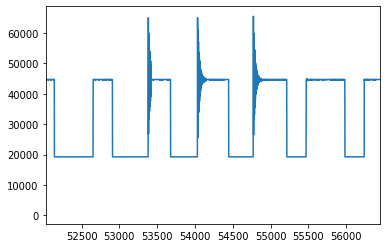

In [35]:
plt.plot(Ring)
plt.xlim([52025,56450]);

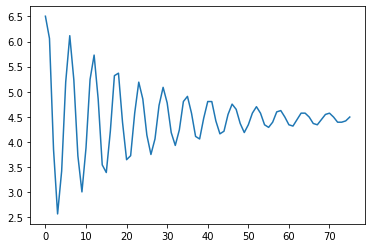

In [64]:
Ring_trunc = Ring[54034:54110] / 10000




#Loading modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares


#Building our x-axis data 0 to length of our data
x  = np.arange(len(Ring_trunc)) 

#Plotting all our data
plt.plot(x, Ring_trunc)

Text(0.5, 1.0, 'RLC Oscillation')

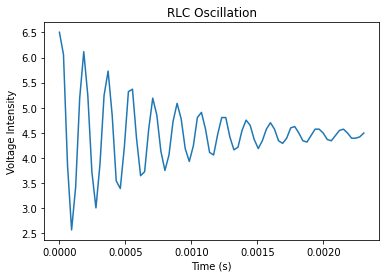

In [65]:
#Converting x-axis to time
samp_rate = 32500
samp_period = 1. / samp_rate 
t  = np.arange(len(Ring_trunc)) * samp_period # Make our axis go from 0 to the duration our data

#Plot now with time
plt.plot(t, Ring_trunc)
plt.xlabel("Time (s)")
plt.ylabel("Voltage Intensity")
plt.title("RLC Oscillation")

In [66]:
def cos_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  alpha = parameters[4]
  y = a * np.cos(omega * time + phi) * np.exp(-alpha*time) + offset
  return y

Best Amplitude: 2.176158274350005
Best Omega: 35539.491080326225
Best offset: 4.458699345399246
Best Phi: -0.3383333440383639
Best Alpha: 1418.8927001466845


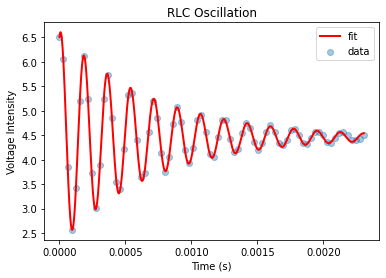

In [67]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

#Theoretical Values (Fill in your values)
R = 9.9
C = 0.0000001
L = 0.001 
w0 = 10,000
alpha = 4950
wd = 8688.9


#Guess parameters
guess_amplitude = 65000. #taken from plot above
guess_omega = wd #taken from theory
guess_offset = np.average(Ring_trunc)
guess_phi = 0
guess_alpha = alpha
guess_parameters = [guess_amplitude, guess_omega, guess_offset, guess_phi, guess_alpha]


#Performing the fit
res_lsq = least_squares(get_residuals, guess_parameters, args=(Ring_trunc,t))

#Fit results
best_parameters = res_lsq['x']
tfit = np.linspace(0,np.max(t),10000)
fitted_function = cos_fit_fun_damped(best_parameters, tfit)
print('Best Amplitude: ' + str(best_parameters[0]))
print('Best Omega: ' + str(best_parameters[1]))
print('Best offset: ' + str(best_parameters[2]))
print('Best Phi: ' + str(best_parameters[3]))
print('Best Alpha: ' + str(best_parameters[4]))

#Plotting results
plt.scatter(t, Ring_trunc, alpha = 0.4, label='data')
plt.plot(tfit, fitted_function, color = 'red', linewidth = 2.0, label='fit')
plt.xlabel("Time (s)")
plt.ylabel("Voltage Intensity")
plt.title("RLC Oscillation")
plt.legend();